In [1]:
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
files = glob.glob('logs/*.csv')

In [3]:
data = pd.read_csv(files[-1], sep=';')

In [4]:
files[-1]

'logs\\AR_Wing-2021-02-05.csv'

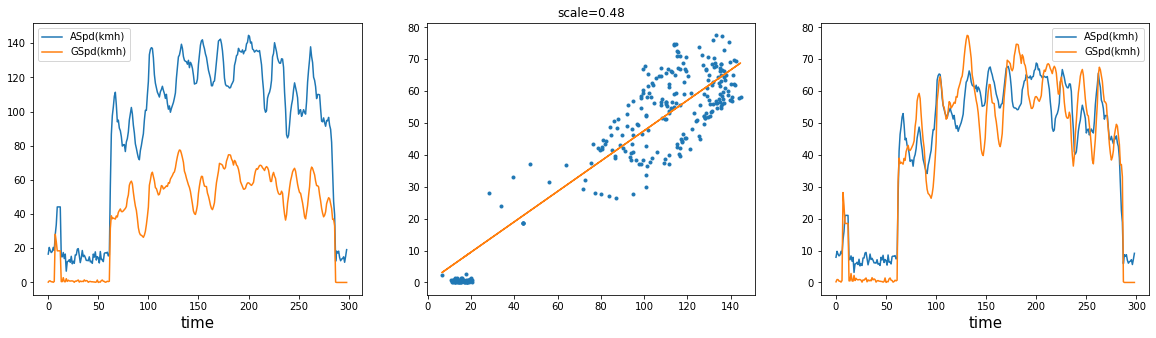

In [5]:
# original
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(data['ASpd(kmh)'], label='ASpd(kmh)')
plt.plot(data['GSpd(kmh)'], label='GSpd(kmh)')
plt.xlabel('time',fontsize=15)
plt.legend()
# fit
d = data['ASpd(kmh)']
x = np.arange(d.max())
seuil = 15
def func(x, a):
    return a * x
a, pcov = curve_fit(func, data['ASpd(kmh)'][d>seuil], data['GSpd(kmh)'][d>seuil])
plt.subplot(132)
plt.plot(data['ASpd(kmh)'], data['GSpd(kmh)'],'.')
plt.plot(data['ASpd(kmh)'], func(data['ASpd(kmh)'], *a))
plt.title('scale={:.2f}'.format(a[0]))
plt.subplot(133)
plt.plot(a[0]*data['ASpd(kmh)'], label='ASpd(kmh)')
plt.plot(data['GSpd(kmh)'], label='GSpd(kmh)')
plt.xlabel('time',fontsize=15)
plt.legend()
plt.show()